<a href="https://colab.research.google.com/github/FelipeSilva1988/Python---UNOPAR/blob/main/Unidade_3_Dados_em_Python_Felipe_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     id_venda  data_venda    produto    categoria  valor_venda
0           1  2023-01-01  Produto A  Eletrônicos       1500.0
1           2  2023-01-05  Produto B       Roupas        350.0
2           3  2023-02-10  Produto C  Eletrônicos       1200.0
3           4  2023-03-15  Produto D       Livros        200.0
4           5  2023-03-20  Produto E  Eletrônicos        800.0
..        ...         ...        ...          ...          ...
541       542  2023-08-25  Produto J  Eletrônicos        700.0
542       543  2023-09-30  Produto K       Livros        300.0
543       544  2023-10-05  Produto L       Roupas        450.0
544       545  2023-11-15  Produto M  Eletrônicos        900.0
545       546  2023-12-20  Produto N       Livros        250.0

[546 rows x 5 columns]
     categoria  valor_venda
0  Eletrônicos     237900.0
1       Livros      35100.0
2       Roupas      70200.0


/tmp/ipython-input-2550747924.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='valor_venda', data=vendas_por_categoria, palette='viridis')


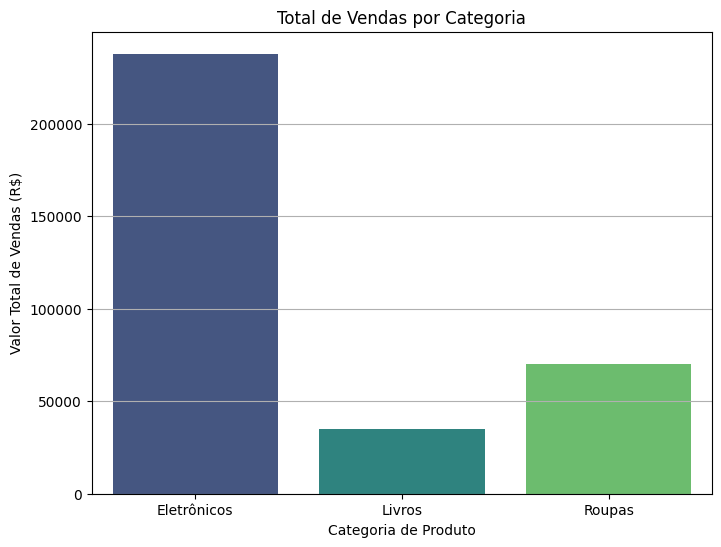

In [40]:
# Conexão do banco de dados SQLite
import sqlite3

# Importando biblioteca Pandas
import pandas as pd

# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Importando a biblioteca seaborn
import seaborn as sns

# Conexão dos banco de dados
conexao = sqlite3.connect('dados_vendas.db')

# Criando um cursor
cursor = conexao.cursor()

# Criando uma tabela
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
data_venda DATE,
produto TEXT,
categoria TEXT,
valor_venda REAL
)
''')

# Inserir alguns dados
cursor.execute('''
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 350.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00);
''')

# Confirmar mudança
conexao.commit()

# Cerregar dados do DataFrame Pandas
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

#Exibir os dados do DataFrame
print(df_vendas)

# Analise dos dados
vendas_por_categoria = df_vendas.groupby(['categoria'])['valor_venda'].sum().reset_index()

# Exibir resultado da analise de dados
print(vendas_por_categoria)

# Visualização dos dados com o Matplotlib e Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='categoria', y='valor_venda', data=vendas_por_categoria, palette='viridis')

plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria de Produto')
plt.ylabel('Valor Total de Vendas (R$)')
plt.grid(axis='y')
plt.show()

conexao.close()


